<a href="https://colab.research.google.com/github/andresgabas/DS-Coderhouse/blob/main/ProyectoDS_ParteI_Gab%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Abstract:

En este proyecto se trabajará con un dataset obtenido del sitio web www.kaggle.com.

El dataset elegido es un archivo .csv que contiene información de pacientes que sufrieron o no infartos (no se aclara la fuente)
El infarto es la segunda causa de muerte más frecuente en el mundo, por lo tanto la posibilidad de crear un modelo que permita la prediccón de un infarto podría prevenir a las personas con riesgo de tomar comsciencia sobre su salud.
Se hará un análisis utilizando diferentes librerías de Python, para conocer la base de datos y ver que variables se podrán utilizar para elaborar un modelo que permita predecir si una persona puede llegar a tener un infarto.

Variables incorporadas en el dataset (Entre paréntesis figuran los nombres de las columnas que se utilizarán en el anásisis para mayor comodidad):
*   ID (ID): columna con un número que identifica a cada paciente. Se eliminará ya que no se va a utilizar.
*   Gender (genero): Género, masculino o femenino. el género otro se eliminó por ser poco representativo.
*   Age (edad): Edad de los participantes del estudio.
*   Hypertension (hipertension): Hipertenso si(1) o no (0).
*   Heart Disease (enfermedad_corazon): Enfermedad cardíaca si(1) o no (0).
*   Ever married (Casado): Si o no
*   work_type (tipo_trabajo: Tipo de trabajo private, self employed, children, govt job or never worked.
*   Residence_type(tipo_residencia): Urbana o rural.
*   avg_glucose_level(glucosa_promedio): Nivel de glucosa promedio.
*   BMI(IMM): indice de masa muscular.
*   smoking_status(fumador): Nunca fumó, desconocido, ex fumador, fumador.
*   stroke(infarto): Tuvo infarto si(1) o no (0).

Se buscará comprobar las siguientes hipótesis
*   Si trabajar con un dataset desequilibrado, puede afectar a la predictabilidad del modelo y conducir a errores en las predicciones.
*   Se buscará comprobar si las personas que tienen enfermedad cardíaca e hipertensión son más propensas a tener infartos.
*   Se buscará averiguar si altos valores de IMM y glucosa promedio son factores que conducen a una probabilidad más alta de tener infartos.
*   Se buscará ver si según el tipo de trabajo, hay más posibilidades de tener infartos.
*   Se buscará comprobar si según se viven en zonas urbanas o rurales, hay más posibilidades de tener infartos.     


In [2]:
url = 'https://raw.githubusercontent.com/andresgabas/DS-Coderhouse/main/healthcare-dataset-stroke-data.csv'
Stroke = pd.read_csv(url)


In [3]:
Stroke.drop('id', axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
Stroke.columns = ['Id','genero','edad','hipertension','enfermedad_corazon','casado','tipo_trabajo','tipo_residencia','glucosa_promedio','IMM','fumador','infarto']

De la columna género, se eliminará la fila correspondiente al género "other" porque al ser un único caso , no es representativa.

In [10]:
Stroke = Stroke[Stroke['genero'] != 'Other']

In [7]:
Stroke.count()

Id                    5109
genero                5109
edad                  5109
hipertension          5109
enfermedad_corazon    5109
casado                5109
tipo_trabajo          5109
tipo_residencia       5109
glucosa_promedio      5109
IMM                   4908
fumador               5109
infarto               5109
dtype: int64

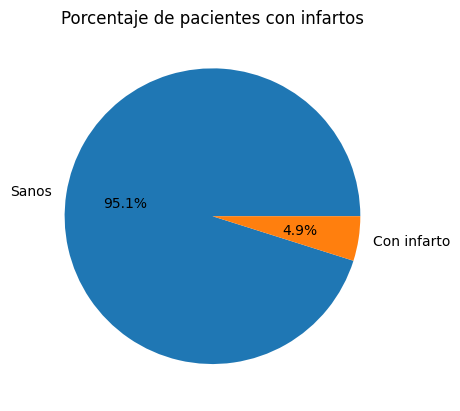

In [11]:
stroke_counts = Stroke['infarto'].value_counts()
plt.pie(stroke_counts, labels=['Sanos', 'Con infarto'], autopct='%1.1f%%')
plt.title('Porcentaje de pacientes con infartos')
plt.show()


Para comenzar se analizó el porcentaje de pacientes que sufrieron un infarto. Se observa en el piechart que solo el 4.9% de los pacientes sufrieron un infarto.  

Text(0.5, 0, 'Género')

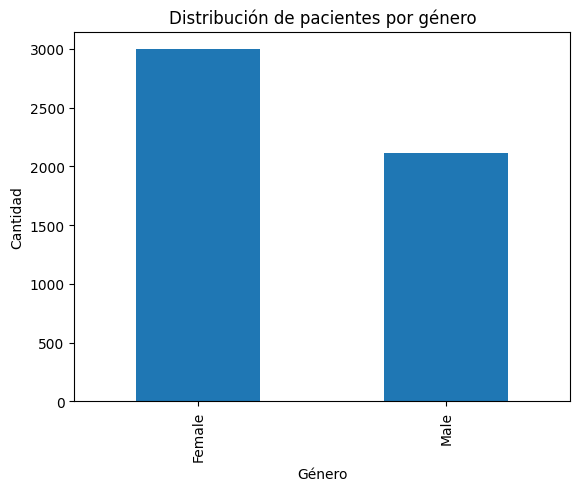

In [12]:
gender_counts = Stroke['genero'].value_counts()
ax = gender_counts.plot(kind='bar')
ax.set_title('Distribución de pacientes por género')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Género')

En este gráfico se observa que la cantidad de participantes mujeres es mayor que la hombres, esto demuestra que este es un dataset desequilibrado. Esto se tendrá en cuenta a la hora de crear el modelo para predecir si un paciente puede tener un infarto o no.

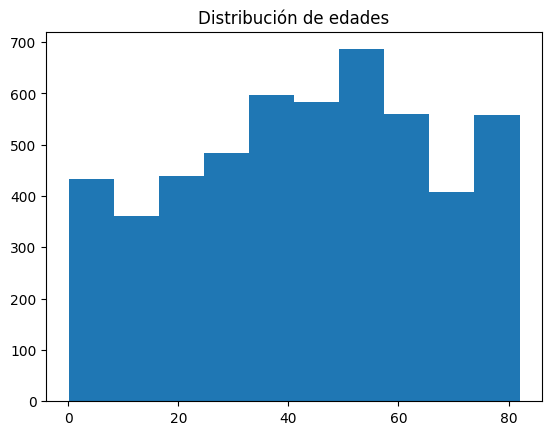

In [13]:
plt.hist(Stroke['edad'])
plt.title('Distribución de edades')
plt.show()

En este histograma de edades de pacientes se observa que la distribución de la edad los pacientes no es normal. Además podemos observar que la mayoría de los pacientes tienen entre 40 y 60 años, más cerca de los sesenta.


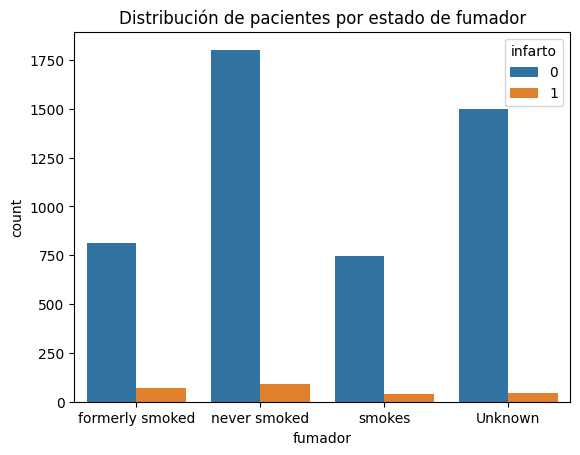

In [14]:
sns.countplot(x='fumador', data=Stroke, hue = 'infarto')
plt.title('Distribución de pacientes por estado de fumador')
plt.show()

En este gráfico gracias al atributo hue que permite agregar una variable más a los ya tenidas en cuenta en el gráfico, podemos decir con seguridad que la mayor parte de los pacientes nunca fumó, también hay una gran porporción de pacientes que se desconoce si fumaron o fuman en la actualidad.


<Axes: xlabel='edad', ylabel='glucosa_promedio'>

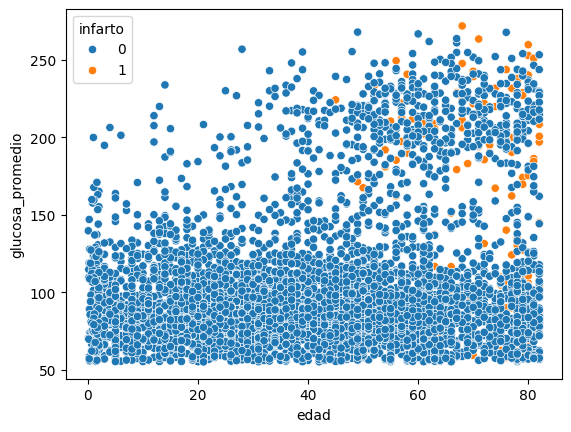

In [15]:
sns.scatterplot(x = 'edad', y = 'glucosa_promedio', data = Stroke, hue = 'infarto')

Se realizó este gráfico de dispersión con el objetivo de ver si había una correlación entre la edad y la glucosa promedio, el gráfico no nos aporta ninguna correlación entre estos factores, pero si se observa que la mayoría de los pacientes con infarto, se corresponden con las zonas de alta glucosa promedio y mayor edad.

<Axes: xlabel='edad', ylabel='IMM'>

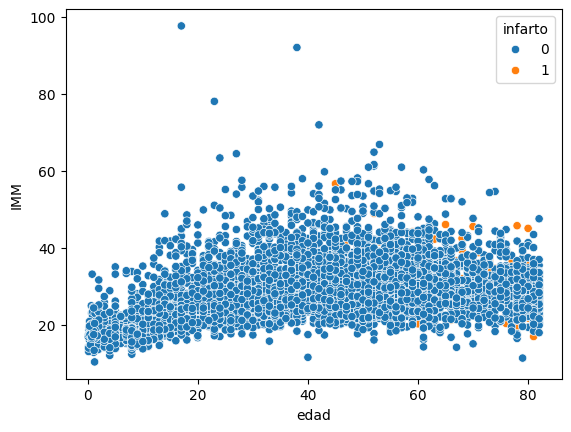

In [16]:
sns.scatterplot(x = 'edad', y = 'IMM', data = Stroke, hue = 'infarto')

En este segundo gráfico de dispersión se trató de ver si existe una correlación entre la edad y el índice de masa muscular pero dada la distribución de los puntos, no se observa una correlación positiva o negativa, sino mas bien una correlación neutra.  

<Axes: xlabel='glucosa_promedio', ylabel='IMM'>

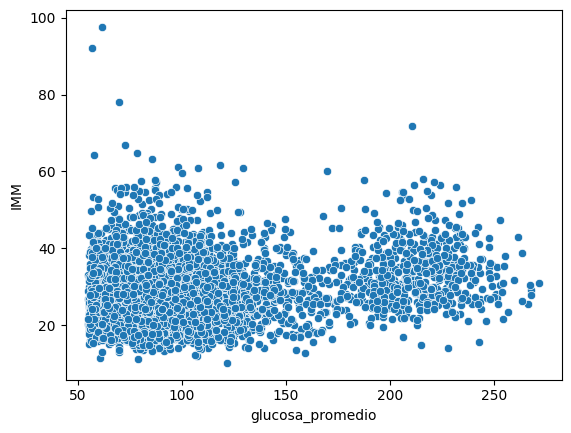

In [17]:
sns.scatterplot(x = 'glucosa_promedio', y = 'IMM', data = Stroke)

En este nuevo Scatterplot se trató de ver si hay una correlación positiva o negativa entre la glucosa promedio y el índice de masa muscular.

El gráfico nos permite decir que no hay una correlación positiva o negativa.

Luego del análisis exploratorio de datos, se procederá a utilizar distintos algoritmos de Machine learning para evaluar distintas variables y ver si se llega a un resultado a partir de estos.